In [25]:
# probelm need to be regenerated
import pandas as pd
prefix = '14-9F-3C-DA-5B-26'
output_path = '/Volumes/hex/ST-1441993385-res/'
p_385 = pd.read_csv(output_path + 'ST-1441993385_2.0.csv')

p_385.columns
len(p_385.index)
# 207799

190454

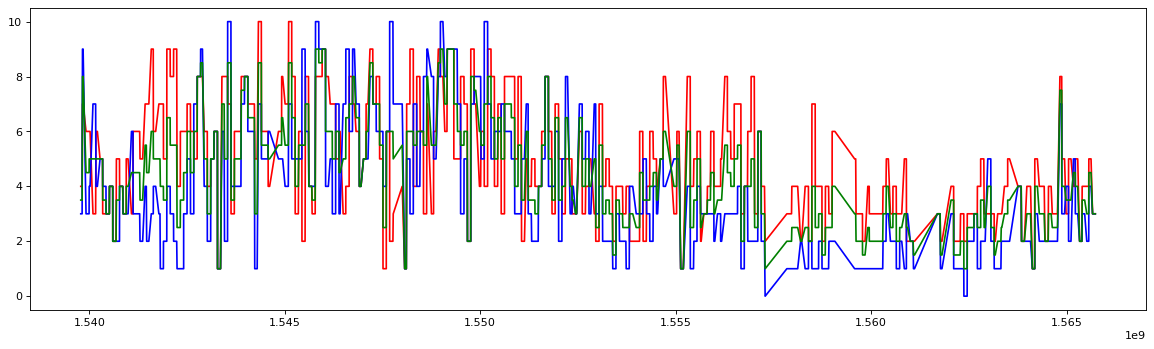

In [26]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p_385[['time']]
yaxis = p_385[['phq_1']]
yaxis2 = p_385[['phq_2']]
avg = p_385[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [27]:
p_385[['time']]

,time
0,1539780400
1,1539780444
2,1539780533
3,1539780590
4,1539780647
...,...
190449,1565735629
190450,1565735690
190451,1565735750
190452,1565735841


In [28]:
p_385[['phq_1']].shape

(190454, 1)

In [29]:
p_385[['phq_1']]

,phq_1
0,4
1,4
2,4
3,4
4,4
...,...
190449,3
190450,3
190451,3
190452,3


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [31]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [32]:
p_385 = p_385.drop(['date', 'window'], axis=1)


In [33]:
train_set, test_set = train_test_split(p_385, test_size=0.25, random_state=42, shuffle=True)

In [34]:
X_train = train_set.loc[:,'accX':'work_time']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'work_time']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [35]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,ple_std,alc,mood,tense,tired,rumination,socialize,socialize_val,sport_time,work_time
28449,0.04,0.02,-0.13,0.02,9.71,0.02,-0.64,0.04,-0.27,0.03,...,57.88,0,7,7,2,9,10,64,0,120
121553,1.50,2.03,-3.25,0.61,8.89,0.61,-0.49,21.61,-0.35,9.53,...,36935.95,0,8,8,5,10,16,72,0,0
113484,8.81,1.97,-1.46,2.57,1.66,2.57,-0.92,21.01,-0.36,11.24,...,101808.80,0,7,7,6,9,19,83,0,0
69545,7.53,2.90,-2.74,3.72,-0.66,3.72,-2.16,42.02,-0.13,33.28,...,196085.49,0,8,8,2,8,29,92,0,0
38590,-3.27,4.18,-6.50,2.45,-2.20,2.45,-2.65,47.90,-2.56,28.69,...,285787.45,0,3,1,0,10,17,78,0,0


In [36]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred_1 = rnd_reg.predict(X_train)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.22465525423557

In [21]:
y_pred_test_1 = rnd_reg.predict(X_test)

In [22]:
forest_test_mse = mean_squared_error(y_test_1, y_pred_test_1)
forest_test_rmse = np.sqrt(forest_test_mse)
forest_test_rmse

1.2231874904793203

In [24]:
cols = []
scores = []
for name, score in zip(X_train.columns, rnd_reg.feature_importances_):
#     print(name, score)
    cols.append(name)
    scores.append(score)
    
print(cols)
print(scores)

['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std', 'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std', 'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'mood', 'tense', 'tired', 'rumination', 'socialize', 'socialize_val', 'sport_time', 'work_time']
[0.0, 0.0, 0.000626591115145361, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.086565336639784e-05, 0.0, 0.00028518060178366755, 0.0, 0.0, 0.0, 0.00032958270025978747, 0.0, 0.00044831840477428913, 0.0, 0.012605114040364912, 0.16979472515140068, 0.2293060681323499, 0.11389365363702834, 0.0029294866541722726, 0.19050596016872265, 0.2477344348202322, 0.030664965727274972, 0.0008050531931244342]


In [67]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

2.7900542055076825

In [28]:
forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [1.25087301 1.23712307 1.23322317 1.24298394 1.23310135 1.24879575
 1.25023498 1.21127483 1.23812528 1.23860825]
Mean: 1.2384343612678923
std dev: 0.011032291218734152


In [30]:
# on test set
from sklearn.metrics import r2_score

y_pred_test = rnd_reg.predict(X_test)
r2_score(y_test_1, y_pred_test)

0.6802747327477925

In [18]:
forest_mae = mean_absolute_error(y_train_1, y_pred_1)
forest_mae

0.4892282975079639

In [44]:
from sklearn.metrics import mean_absolute_error

forest_test_mea = mean_absolute_error(y_test_1, y_pred_test_1)
forest_test_mea

0.9690954685315722

In [48]:
forest_mae = mean_absolute_error(y_train_1, y_pred_1)
forest_mae

0.9697898437972934

In [46]:
forest_scores_mae = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_absolute_error", cv=10)


In [47]:
display_scores(-forest_scores_mae)

scores: [0.95930217 0.94886312 0.96930992 0.95297089 0.95624832 0.96915651
 0.97299059 0.9623452  0.97921129 0.94398824]
Mean: 0.9614386244721622
std dev: 0.010665486800252155
